In [1]:
%matplotlib notebook

import pandas
import numpy
from matplotlib import pyplot

In [5]:
# path = '/scr-ssd/mimic/clinic-data/{}.csv'
root = '/scr-ssd/mimic/'
clinic_file = lambda i: root + 'clinic-data/{}.csv'.format(i.upper())

## ICD Diagnoses

In [3]:
diagnoses_info = pandas.read_csv(clinic_file('d_icd_diagnoses'))
diagnoses_info = diagnoses_info.drop(columns='ROW_ID').set_index('ICD9_CODE')
diagnoses = pandas.read_csv(clinic_file('diagnoses_icd')).drop(columns='ROW_ID')
diagnoses[:5]

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,109,172335,1.0,40301
1,109,172335,2.0,486
2,109,172335,3.0,58281
3,109,172335,4.0,5855
4,109,172335,5.0,4254


In [4]:
counts = diagnoses['ICD9_CODE'].value_counts()
counts = pandas.concat([diagnoses_info.reindex(counts.index), pandas.Series(counts, name='COUNT')], axis=1)
counts[:50]

,SHORT_TITLE,LONG_TITLE,COUNT
4019,Hypertension NOS,Unspecified essential hypertension,20703
4280,CHF NOS,"Congestive heart failure, unspecified",13111
42731,Atrial fibrillation,Atrial fibrillation,12891
41401,Crnry athrscl natve vssl,Coronary atherosclerosis of native coronary ar...,12429
5849,Acute kidney failure NOS,"Acute kidney failure, unspecified",9119
25000,DMII wo cmp nt st uncntr,Diabetes mellitus without mention of complicat...,9058
2724,Hyperlipidemia NEC/NOS,Other and unspecified hyperlipidemia,8690
51881,Acute respiratry failure,Acute respiratory failure,7497
5990,Urin tract infection NOS,"Urinary tract infection, site not specified",6555
53081,Esophageal reflux,Esophageal reflux,6326


## CPT Events

In [15]:
cpt_info = pandas.read_csv(path.format('D_CPT'))
cpt_info[:5]

,ROW_ID,CATEGORY,SECTIONRANGE,SECTIONHEADER,SUBSECTIONRANGE,SUBSECTIONHEADER,CODESUFFIX,MINCODEINSUBSECTION,MAXCODEINSUBSECTION
0,1,1,99201-99499,Evaluation and management,99201-99216,Office/other outpatient services,NaN,99201,99216
1,2,1,99201-99499,Evaluation and management,99217-99220,Hospital observation services,NaN,99217,99220
2,3,1,99201-99499,Evaluation and management,99221-99239,Hospital inpatient services,NaN,99221,99239
3,4,1,99201-99499,Evaluation and management,99241-99255,Consultations,NaN,99241,99255
4,5,1,99201-99499,Evaluation and management,99261-99263,Follow-up inpatient consultations (deleted codes),NaN,99261,99263


In [16]:
cpt = pandas.read_csv(path.format('CPTEVENTS'), low_memory=False, parse_dates=['CHARTDATE'])
cpt[:5]

,ROW_ID,SUBJECT_ID,HADM_ID,COSTCENTER,CHARTDATE,CPT_CD,CPT_NUMBER,CPT_SUFFIX,TICKET_ID_SEQ,SECTIONHEADER,SUBSECTIONHEADER,DESCRIPTION
0,317,11743,129545,ICU,NaT,99232,99232.0,NaN,6.0,Evaluation and management,Hospital inpatient services,NaN
1,318,11743,129545,ICU,NaT,99232,99232.0,NaN,7.0,Evaluation and management,Hospital inpatient services,NaN
2,319,11743,129545,ICU,NaT,99232,99232.0,NaN,8.0,Evaluation and management,Hospital inpatient services,NaN
3,320,11743,129545,ICU,NaT,99232,99232.0,NaN,9.0,Evaluation and management,Hospital inpatient services,NaN
4,321,6185,183725,ICU,NaT,99223,99223.0,NaN,1.0,Evaluation and management,Hospital inpatient services,NaN


In [17]:
cpt['SECTIONHEADER'].value_counts()

Evaluation and management    404388
Medicine                     114194
Surgery                       50807
Radiology                      2974
Anesthesia                      687
Pathology and laboratory         53
Emerging technology              22
Name: SECTIONHEADER, dtype: int64

In [18]:
(cpt['SECTIONHEADER'] + ': ' + cpt['SUBSECTIONHEADER']).value_counts()[:10]

Evaluation and management: Hospital inpatient services    268296
Evaluation and management: Critical care services         106469
Medicine: Pulmonary                                       101563
Evaluation and management: Consultations                   25925
Surgery: Cardiovascular system                             21485
Surgery: Respiratory system                                10516
Medicine: Dialysis                                          9778
Surgery: Musculoskeletal system                             6275
Surgery: Digestive system                                   4979
Surgery: Nervous system                                     3662
dtype: int64

In [19]:
cpt['COSTCENTER'].value_counts()

ICU     471601
Resp    101545
Name: COSTCENTER, dtype: int64

In [20]:
cpt['DESCRIPTION'].value_counts()

VENT MGMT;SUBSQ DAYS(INVASIVE)    86712
VENT MGMT, 1ST DAY (INVASIVE)     12552
VENT MGMT;SUBSQ DAYS(NIV)          1272
VENT MGMT,1ST DAY (NIV)            1009
Name: DESCRIPTION, dtype: int64

## ICD Procedures

In [21]:
procedures_info = pandas.read_csv(path.format('D_ICD_PROCEDURES'), dtype={'ICD9_CODE': 'str'})
procedures_info[:5]

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,264,0851,Canthotomy,Canthotomy
1,265,0852,Blepharorrhaphy,Blepharorrhaphy
2,266,0859,Adjust lid position NEC,Other adjustment of lid position
3,267,0861,Lid reconst w skin graft,Reconstruction of eyelid with skin flap or graft
4,268,0862,Lid reconst w muc graft,Reconstruction of eyelid with mucous membrane ...


In [22]:
procedures = pandas.read_csv(path.format('PROCEDURES_ICD'), dtype={'ICD9_CODE': 'str'})
procedures[:5]

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,944,62641,154460,3,3404
1,945,2592,130856,1,9671
2,946,2592,130856,2,3893
3,947,55357,119355,1,9672
4,948,55357,119355,2,0331


In [23]:
k = 'ICD9_CODE'
procedures_info.set_index(k).reindex(procedures[k])['LONG_TITLE'].value_counts()[:20]

Venous catheterization, not elsewhere classified                                 14731
Insertion of endotracheal tube                                                   10333
Enteral infusion of concentrated nutritional substances                           9300
Continuous invasive mechanical ventilation for less than 96 consecutive hours     9100
Transfusion of packed cells                                                       7244
Extracorporeal circulation auxiliary to open heart surgery                        6838
Continuous invasive mechanical ventilation for 96 consecutive hours or more       6048
Prophylactic administration of vaccine against other diseases                     5842
Coronary arteriography using two catheters                                        5337
Arterial catheterization                                                          4737
Single internal mammary-coronary artery bypass                                    4401
Parenteral infusion of concentrated nutriti

## Procedure Events

In [18]:
procevents = pandas.read_csv(path.format('PROCEDUREEVENTS_MV'))
items_info = pandas.read_csv(path.format('D_ITEMS')).set_index('ITEMID')
items_info[:5]

,ROW_ID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
ITEMID,,,,,,,,,
497,457,Patient controlled analgesia (PCA) [Inject],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
498,458,PCA Lockout (Min),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
499,459,PCA Medication,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
500,460,PCA Total Dose,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
501,461,PCV Exh Vt (Obser),NaN,carevue,chartevents,NaN,NaN,NaN,NaN


In [19]:
procevents[:5][procevents.keys()[:15]]

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,VALUE,VALUEUOM,LOCATION,LOCATIONCATEGORY,STORETIME,CGID,ORDERID,LINKORDERID
0,379,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225401,1.0,None,NaN,NaN,2145-03-12 23:04:00,20855,5092605,5092605
1,380,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225454,1.0,None,NaN,NaN,2145-03-12 23:04:00,20855,2538599,2538599
2,381,29070,115071,232563.0,2145-03-12 23:05:00,2145-03-18 20:01:00,225792,8456.0,hour,NaN,NaN,2145-03-18 20:01:39,20889,2383835,2383835
3,382,29070,115071,232563.0,2145-03-12 23:36:00,2145-03-12 23:37:00,225402,1.0,None,NaN,NaN,2145-03-12 23:36:00,20855,9355062,9355062
4,383,29070,115071,232563.0,2145-03-13 01:27:00,2145-03-16 16:00:00,224560,5193.0,min,Right IJ,Invasive Venous,2145-03-16 17:57:00,20855,466169,466169


In [20]:
procevents[:5][procevents.keys()[15:]]

,ORDERCATEGORYNAME,SECONDARYORDERCATEGORYNAME,ORDERCATEGORYDESCRIPTION,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE
0,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
1,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
2,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
3,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
4,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN


In [21]:
procevents['LOCATION'].value_counts()[:10]

Right IJ                    6219
Right Radial                4881
Left Radial                 3732
Right Antecubital           3110
Left Antecubital            2867
Left Cephalic Lower Arm     2172
Right Cephalic Lower Arm    1871
Left Metacarpal             1713
Right Metacarpal            1638
Left Basilic Lower Arm      1583
Name: LOCATION, dtype: int64

In [22]:
procevents['LOCATIONCATEGORY'].value_counts()[:10]

Peripheral             20960
Invasive Venous        10921
Invasive Arterial      10087
Peripheral - old        9815
Dialysis                 547
ICP Line                 160
Peritoneal Dialysis       78
Intraosseous              44
Name: LOCATIONCATEGORY, dtype: int64

In [23]:
procevents['ORDERCATEGORYDESCRIPTION'].value_counts()

Electrolytes    144246
Task            113820
Name: ORDERCATEGORYDESCRIPTION, dtype: int64

In [26]:
items_info.reindex(procevents['ITEMID'])['LABEL'].value_counts()[:50]

Chest X-Ray                     32723
20 Gauge                        28145
18 Gauge                        20459
EKG                             13962
Arterial Line                   12703
Invasive Ventilation            10749
Blood Cultured                  10211
CT scan                          8779
Extubation                       8328
Multi Lumen                      7911
22 Gauge                         6240
16 Gauge                         6096
Nasal Swab                       5895
Urine Culture                    5713
OR Received                      5524
Ultrasound                       4672
Intubation                       4514
Family updated by RN             4496
PICC Line                        4451
Transthoracic Echo               4414
Sputum Culture                   3290
X-ray                            2974
Cordis/Introducer                2769
Bronchoscopy                     2716
Family updated by MD             2536
OR Sent                          2454
Magnetic Res

## Admissions

In [29]:
date_cols = ['ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'EDREGTIME', 'EDOUTTIME']
admissions = pandas.read_csv(path.format('ADMISSIONS'), parse_dates=date_cols).set_index('HADM_ID')
admissions[:5]

,ROW_ID,SUBJECT_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
HADM_ID,,,,,,,,,,,,,,,,,,
165315,21,22,2196-04-09 12:26:00,2196-04-10 15:54:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
152223,22,23,2153-09-03 07:15:00,2153-09-08 19:10:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaT,NaT,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
124321,23,23,2157-10-18 19:34:00,2157-10-25 14:00:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaT,NaT,BRAIN MASS,0,1
161859,24,24,2139-06-06 16:14:00,2139-06-09 12:48:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaT,NaT,INTERIOR MYOCARDIAL INFARCTION,0,1
129635,25,25,2160-11-02 02:06:00,2160-11-05 14:55:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [25]:
admissions['ADMISSION_TYPE'].value_counts()

EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: ADMISSION_TYPE, dtype: int64

In [26]:
admissions['ADMISSION_LOCATION'].value_counts()

EMERGENCY ROOM ADMIT         22754
PHYS REFERRAL/NORMAL DELI    15079
CLINIC REFERRAL/PREMATURE    12032
TRANSFER FROM HOSP/EXTRAM     8456
TRANSFER FROM SKILLED NUR      273
** INFO NOT AVAILABLE **       204
HMO REFERRAL/SICK              102
TRANSFER FROM OTHER HEALT       71
TRSF WITHIN THIS FACILITY        5
Name: ADMISSION_LOCATION, dtype: int64

In [31]:
admissions['DIAGNOSIS'].value_counts()[:25]

NEWBORN                                                      7823
PNEUMONIA                                                    1566
SEPSIS                                                       1184
CONGESTIVE HEART FAILURE                                      928
CORONARY ARTERY DISEASE                                       840
CHEST PAIN                                                    778
INTRACRANIAL HEMORRHAGE                                       713
ALTERED MENTAL STATUS                                         712
GASTROINTESTINAL BLEED                                        686
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA     583
UPPER GI BLEED                                                580
ABDOMINAL PAIN                                                554
FEVER                                                         510
DIABETIC KETOACIDOSIS                                         462
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT/SDA      450
S/P FALL  

<IPython.core.display.Javascript object>


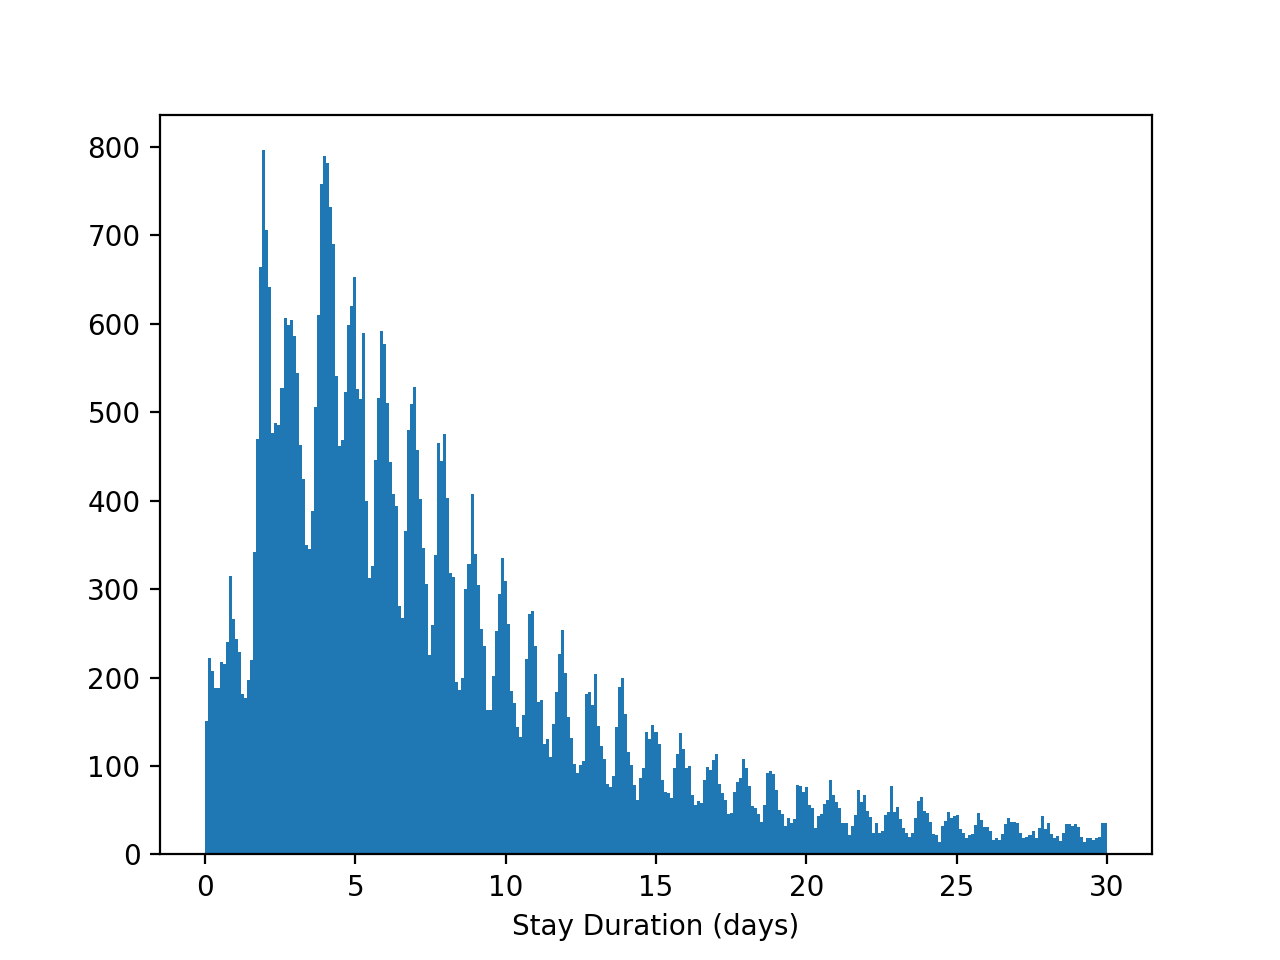

In [36]:
to_days = lambda i: i.total_seconds()/3600/24
stay_length = (admissions['DISCHTIME'] - admissions['ADMITTIME']).map(to_days)

pyplot.figure()
stay_length.hist(bins=numpy.linspace(0, 30, 300), grid=False).set_xlabel('Stay Duration (days)');

In [29]:
(admissions['HOSPITAL_EXPIRE_FLAG'] == ~admissions['DEATHTIME'].isna()).all()

True

In [30]:
admissions['HOSPITAL_EXPIRE_FLAG'].value_counts()

0    53122
1     5854
Name: HOSPITAL_EXPIRE_FLAG, dtype: int64

<IPython.core.display.Javascript object>


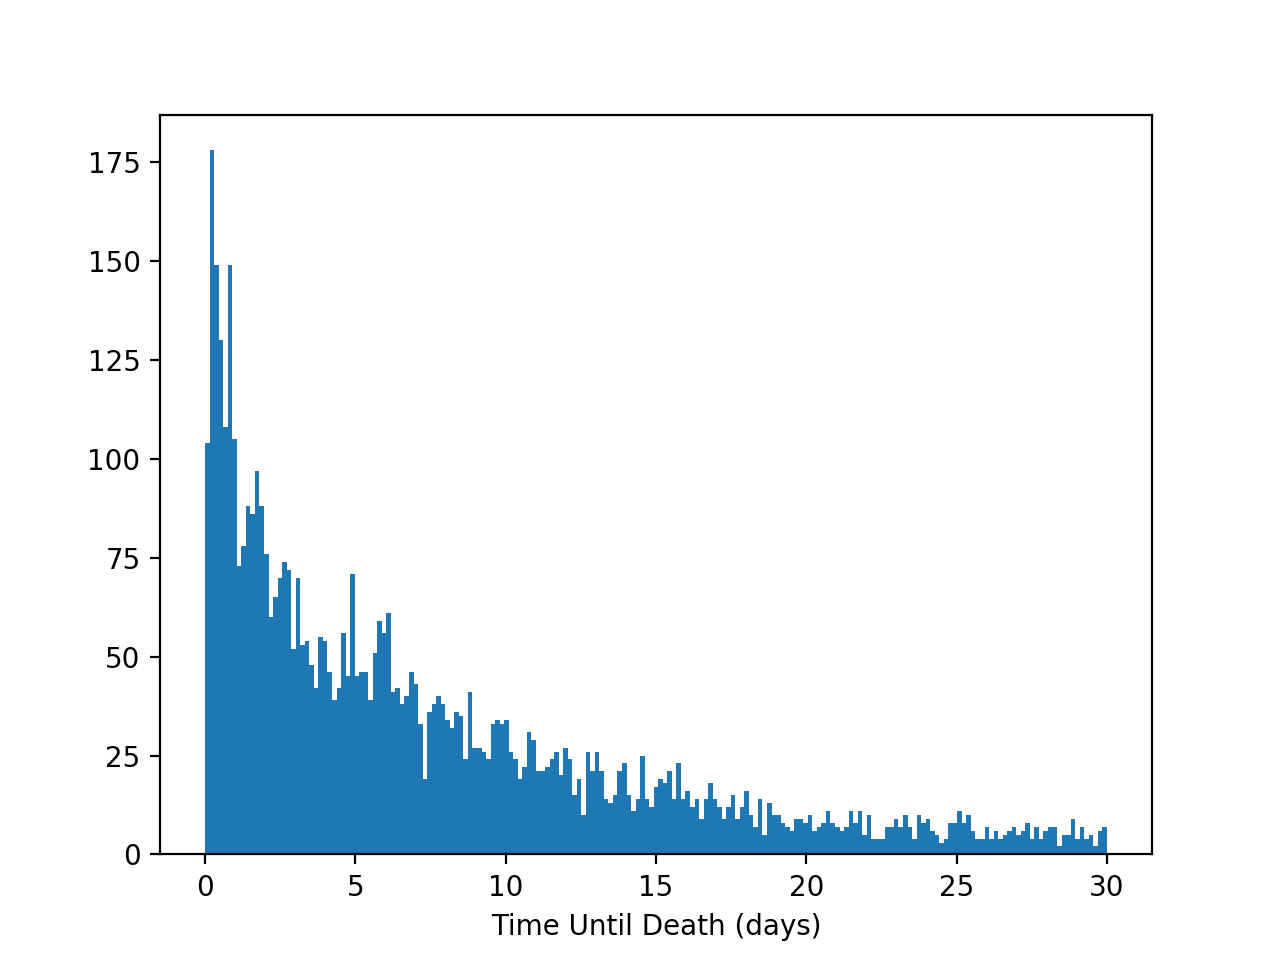

In [39]:
stay_length = (admissions['DEATHTIME'] - admissions['ADMITTIME']).map(to_days)

pyplot.figure()
stay_length.hist(bins=numpy.linspace(0, 30, 200), grid=False).set_xlabel('Time Until Death (days)');

In [40]:
admissions['INSURANCE'].value_counts()

Medicare      28215
Private       22582
Medicaid       5785
Government     1783
Self Pay        611
Name: INSURANCE, dtype: int64

In [35]:
admissions['LANGUAGE'].value_counts()[:10]

ENGL    29086
SPAN     1083
RUSS      790
PTUN      628
CANT      413
PORT      342
CAPE      256
MAND      156
HAIT      150
ITAL      124
Name: LANGUAGE, dtype: int64

In [42]:
admissions['RELIGION'].value_counts()[:10]

CATHOLIC               20606
NOT SPECIFIED          11753
UNOBTAINABLE            8269
PROTESTANT QUAKER       7134
JEWISH                  5314
OTHER                   2696
EPISCOPALIAN             774
GREEK ORTHODOX           459
CHRISTIAN SCIENTIST      429
BUDDHIST                 267
Name: RELIGION, dtype: int64

In [43]:
admissions['MARITAL_STATUS'].value_counts()

MARRIED              24239
SINGLE               13254
WIDOWED               7211
DIVORCED              3213
SEPARATED              571
UNKNOWN (DEFAULT)      345
LIFE PARTNER            15
Name: MARITAL_STATUS, dtype: int64

In [44]:
admissions['ETHNICITY'].value_counts()[:10]

WHITE                             40996
BLACK/AFRICAN AMERICAN             5440
UNKNOWN/NOT SPECIFIED              4523
HISPANIC OR LATINO                 1696
OTHER                              1512
ASIAN                              1509
UNABLE TO OBTAIN                    814
PATIENT DECLINED TO ANSWER          559
ASIAN - CHINESE                     277
HISPANIC/LATINO - PUERTO RICAN      232
Name: ETHNICITY, dtype: int64

## Patients

In [45]:
date_cols = ['DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN']
patients = pandas.read_csv(path.format('PATIENTS'), parse_dates=date_cols).set_index('SUBJECT_ID')
patients[:5]

,ROW_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
SUBJECT_ID,,,,,,,
249,234,F,2075-03-13,NaT,NaT,NaT,0
250,235,F,2164-12-27,2188-11-22,2188-11-22,NaT,1
251,236,M,2090-03-15,NaT,NaT,NaT,0
252,237,M,2078-03-06,NaT,NaT,NaT,0
253,238,F,2089-11-26,NaT,NaT,NaT,0


In [46]:
patients['GENDER'].value_counts()

M    26121
F    20399
Name: GENDER, dtype: int64

In [54]:
sum(ages < 10) / len(ages)

0.13751356483993488

infants: 13.8%, 89+: 4.4%


<IPython.core.display.Javascript object>


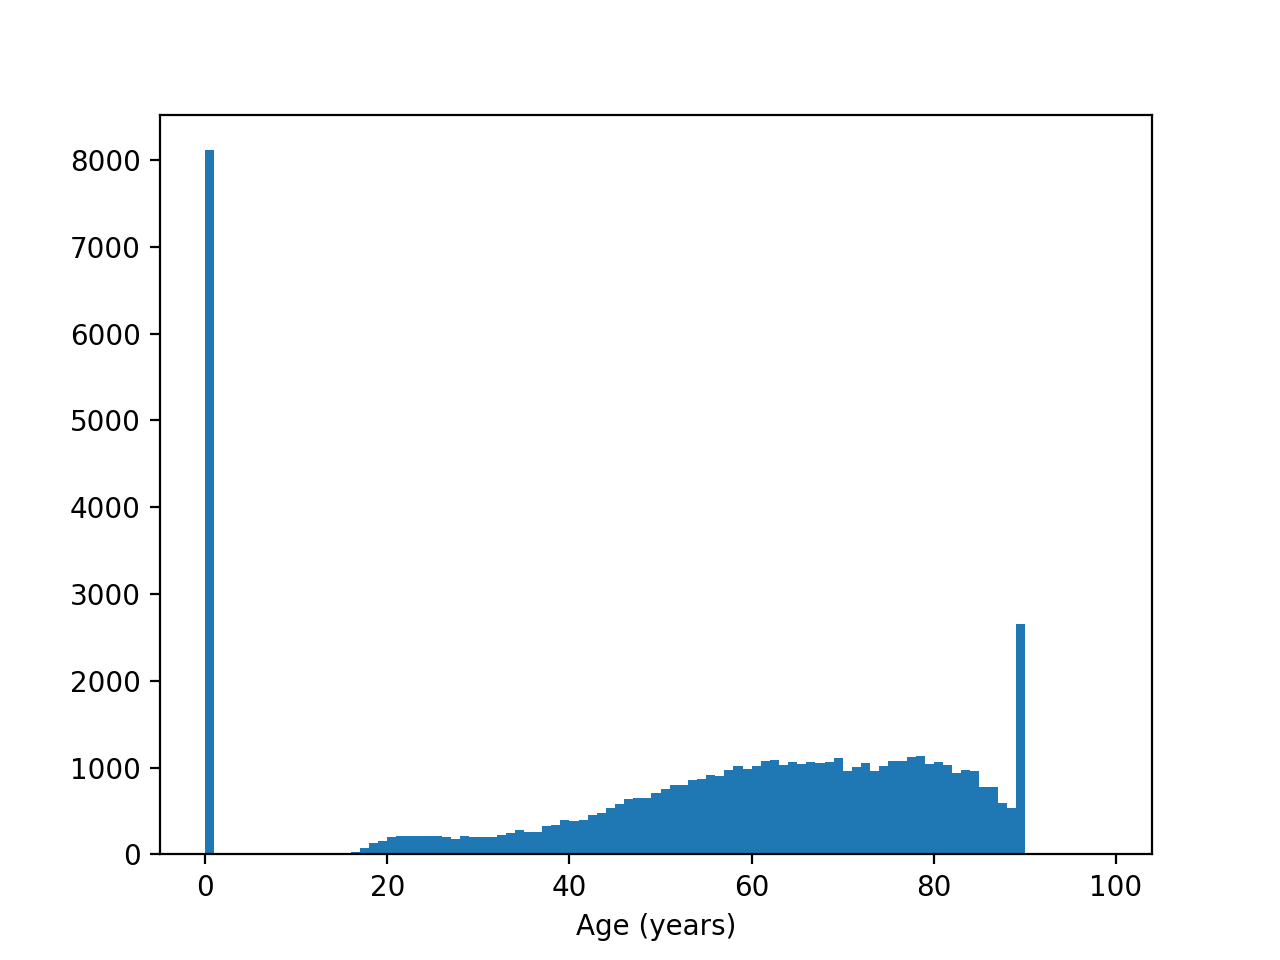

In [61]:
t1 = patients.reindex(admissions['SUBJECT_ID'])['DOB']
t2 = admissions['ADMITTIME']
ages = t2.values - t1.values
ages = ages.astype('float') / (1e9 * 3600 * 24 * 365)
ages[ages < 0] = 89.5

pct_infant = sum(ages < 10) / len(ages) * 100
pct_old = sum(ages == 89.5) / len(ages) * 100
print('infants: {}%, 89+: {}%'.format(numpy.round(pct_infant, 1), numpy.round(pct_old, 1)))

pyplot.figure()
pandas.Series(ages).hist(bins = range(0, 100), grid=False).set_xlabel('Age (years)');

## Datetime Events

In [188]:
dtimes = pandas.read_csv(path.format('DATETIMEEVENTS'), low_memory=False)
dtimes[:5]

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,711,7657,121183.0,297945.0,3411,2172-03-14 11:00:00,2172-03-14 11:52:00,16446,NaN,Date,NaN,NaN,NaN,NotStopd
1,712,7657,121183.0,297945.0,3411,2172-03-14 13:00:00,2172-03-14 12:36:00,16446,NaN,Date,NaN,NaN,NaN,NotStopd
2,713,7657,121183.0,297945.0,3411,2172-03-14 15:00:00,2172-03-14 15:10:00,14957,NaN,Date,NaN,NaN,NaN,NotStopd
3,714,7657,121183.0,297945.0,3411,2172-03-14 17:00:00,2172-03-14 17:01:00,16446,NaN,Date,NaN,NaN,NaN,NotStopd
4,715,7657,121183.0,297945.0,3411,2172-03-14 19:00:00,2172-03-14 19:29:00,14815,NaN,Date,NaN,NaN,NaN,NotStopd


## Labs

In [36]:
labs = pandas.read_csv(path.format('LABEVENTS'))
labs[:5]

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal


In [37]:
lab_info = pandas.read_csv(path.format('D_LABITEMS')).set_index('ITEMID')
labs_info = lab_info.reindex(labs['ITEMID'])
lab_info[:5]

,ROW_ID,LABEL,FLUID,CATEGORY,LOINC_CODE
ITEMID,,,,,
51346,546,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
51347,547,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
51348,548,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
51349,549,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
51350,550,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN


In [38]:
labs_info['FLUID'].map(lambda i: i.title()).value_counts()

Blood                        25746611
Urine                         1975918
Cerebrospinal Fluid (Csf)       35917
Ascites                         31224
Pleural                         28393
Other Body Fluid                24673
Bone Marrow                      5368
Joint Fluid                      5321
Stool                             630
Name: FLUID, dtype: int64

In [12]:
labs_info['CATEGORY'].map(lambda i: i.title()).value_counts()

Hematology    11872261
Chemistry     10983768
Blood Gas      4998026
Name: CATEGORY, dtype: int64

In [22]:
labs_info['LABEL'].value_counts()[:10]

Glucose           1046912
Hematocrit         881769
Potassium          845739
Hemoglobin         842156
Sodium             808401
Creatinine         797389
Chloride           795480
Urea Nitrogen      791838
Bicarbonate        780648
Platelet Count     778365
Name: LABEL, dtype: int64

In [39]:
lab_names = labs_info['LABEL'] + ', ' + labs_info['CATEGORY'] + ', ' + labs_info['FLUID']
lab_counts = lab_names.map(lambda i: i.title()).value_counts()
lab_counts[:50]

Hematocrit, Hematology, Blood                        881764
Potassium, Chemistry, Blood                          845737
Sodium, Chemistry, Blood                             808401
Creatinine, Chemistry, Blood                         797389
Chloride, Chemistry, Blood                           795480
Urea Nitrogen, Chemistry, Blood                      791838
Bicarbonate, Chemistry, Blood                        780648
Platelet Count, Hematology, Blood                    778365
Anion Gap, Chemistry, Blood                          769810
White Blood Cells, Hematology, Blood                 753221
Hemoglobin, Hematology, Blood                        752444
Glucose, Chemistry, Blood                            748896
Mchc, Hematology, Blood                              748147
Red Blood Cells, Hematology, Blood                   747999
Mch, Hematology, Blood                               747994
Mcv, Hematology, Blood                               747977
Rdw, Hematology, Blood                  

In [146]:
lab_counts[lab_counts.keys().map(lambda i: 'Hematology, Urine' in i)][:20]

Ph, Hematology, Urine                    116081
Specific Gravity, Hematology, Urine      115858
Protein, Hematology, Urine               106412
Urobilinogen, Hematology, Urine          101817
Ketone, Hematology, Urine                101624
Glucose, Hematology, Urine               101280
Urine Color, Hematology, Urine           100377
Urine Appearance, Hematology, Urine       99838
Blood, Hematology, Urine                  99726
Bilirubin, Hematology, Urine              99680
Nitrite, Hematology, Urine                99675
Leukocytes, Hematology, Urine             97625
Yeast, Hematology, Urine                  85457
Wbc, Hematology, Urine                    84682
Rbc, Hematology, Urine                    84278
Epithelial Cells, Hematology, Urine       83200
Bacteria, Hematology, Urine               73412
Hyaline Casts, Hematology, Urine          15118
Urine Mucous, Hematology, Urine           14204
Amorphous Crystals, Hematology, Urine      6839
dtype: int64

In [145]:
lab_counts[lab_counts.keys().map(lambda i: 'Chemistry, Urine' in i)][:20]

Length Of Urine Collection, Chemistry, Urine      46834
Creatinine, Urine, Chemistry, Urine               33062
Sodium, Urine, Chemistry, Urine                   25990
Osmolality, Urine, Chemistry, Urine               18838
Urea Nitrogen, Urine, Chemistry, Urine            13294
Gr Hold, Chemistry, Urine                         11849
Potassium, Urine, Chemistry, Urine                10931
Chloride, Urine, Chemistry, Urine                  9600
Cocaine, Urine, Chemistry, Urine                   9387
Benzodiazepine Screen, Urine, Chemistry, Urine     9328
Amphetamine Screen, Urine, Chemistry, Urine        9310
Opiate Screen, Urine, Chemistry, Urine             9308
Barbiturate Screen, Urine, Chemistry, Urine        9287
Methadone, Urine, Chemistry, Urine                 9263
Total Protein, Urine, Chemistry, Urine             9080
Protein/Creatinine Ratio, Chemistry, Urine         7709
Uhold, Chemistry, Urine                            3749
Albumin, Urine, Chemistry, Urine                

In [70]:
lab_counts[lab_counts.keys().map(lambda i: 'Cerebrospinal Fluid' in i)][:10]

Lymphs, Hematology, Cerebrospinal Fluid (Csf)                       4732
Wbc, Csf, Hematology, Cerebrospinal Fluid (Csf)                     4718
Monocytes, Hematology, Cerebrospinal Fluid (Csf)                    4701
Rbc, Csf, Hematology, Cerebrospinal Fluid (Csf)                     4700
Polys, Hematology, Cerebrospinal Fluid (Csf)                        4689
Total Protein, Csf, Chemistry, Cerebrospinal Fluid (Csf)            4181
Glucose, Csf, Chemistry, Cerebrospinal Fluid (Csf)                  4077
Macrophage, Hematology, Cerebrospinal Fluid (Csf)                   1138
Eosinophils, Hematology, Cerebrospinal Fluid (Csf)                   655
Lactate Dehydrogenase, Csf, Chemistry, Cerebrospinal Fluid (Csf)     642
dtype: int64

In [151]:
lab_counts[lab_counts.keys().map(lambda i: 'Ascites' in i)][:10]

Wbc, Ascites, Hematology, Ascites                     3347
Lymphocytes, Hematology, Ascites                      3346
Monocytes, Hematology, Ascites                        3345
Polys, Hematology, Ascites                            3344
Rbc, Ascites, Hematology, Ascites                     3280
Macrophage, Hematology, Ascites                       2280
Mesothelial Cell, Hematology, Ascites                 2061
Total Protein, Ascites, Chemistry, Ascites            1805
Albumin, Ascites, Chemistry, Ascites                  1592
Lactate Dehydrogenase, Ascites, Chemistry, Ascites    1243
dtype: int64

In [154]:
lab_counts[lab_counts.keys().map(lambda i: 'Bone Marrow' in i)][:5]

Wright Giemsa, Hematology, Bone Marrow        637
Iron Stain, Hematology, Bone Marrow           340
Immunophenotyping, Hematology, Bone Marrow    315
Cd45, Hematology, Bone Marrow                 307
Cd19, Hematology, Bone Marrow                 248
dtype: int64

### Glucose Levels

In [57]:
lab_info.loc[lab_info['LABEL'].map(lambda i: 'glucose' in i.lower())]

,ROW_ID,LABEL,FLUID,CATEGORY,LOINC_CODE
ITEMID,,,,,
50809,10,Glucose,Blood,Blood Gas,2339-0
50842,43,"Glucose, Ascites",Ascites,Chemistry,2347-3
50931,132,Glucose,Blood,Chemistry,2345-7
51014,214,"Glucose, CSF",Cerebrospinal Fluid (CSF),Chemistry,2342-4
51022,222,"Glucose, Joint Fluid",Joint Fluid,Chemistry,2348-1
51034,234,"Glucose, Body Fluid",Other Body Fluid,Chemistry,2344-0
51053,253,"Glucose, Pleural",Pleural,Chemistry,2346-5
51084,284,"Glucose, Urine",Urine,Chemistry,2350-7
51478,678,Glucose,Urine,Hematology,5792-7


<IPython.core.display.Javascript object>


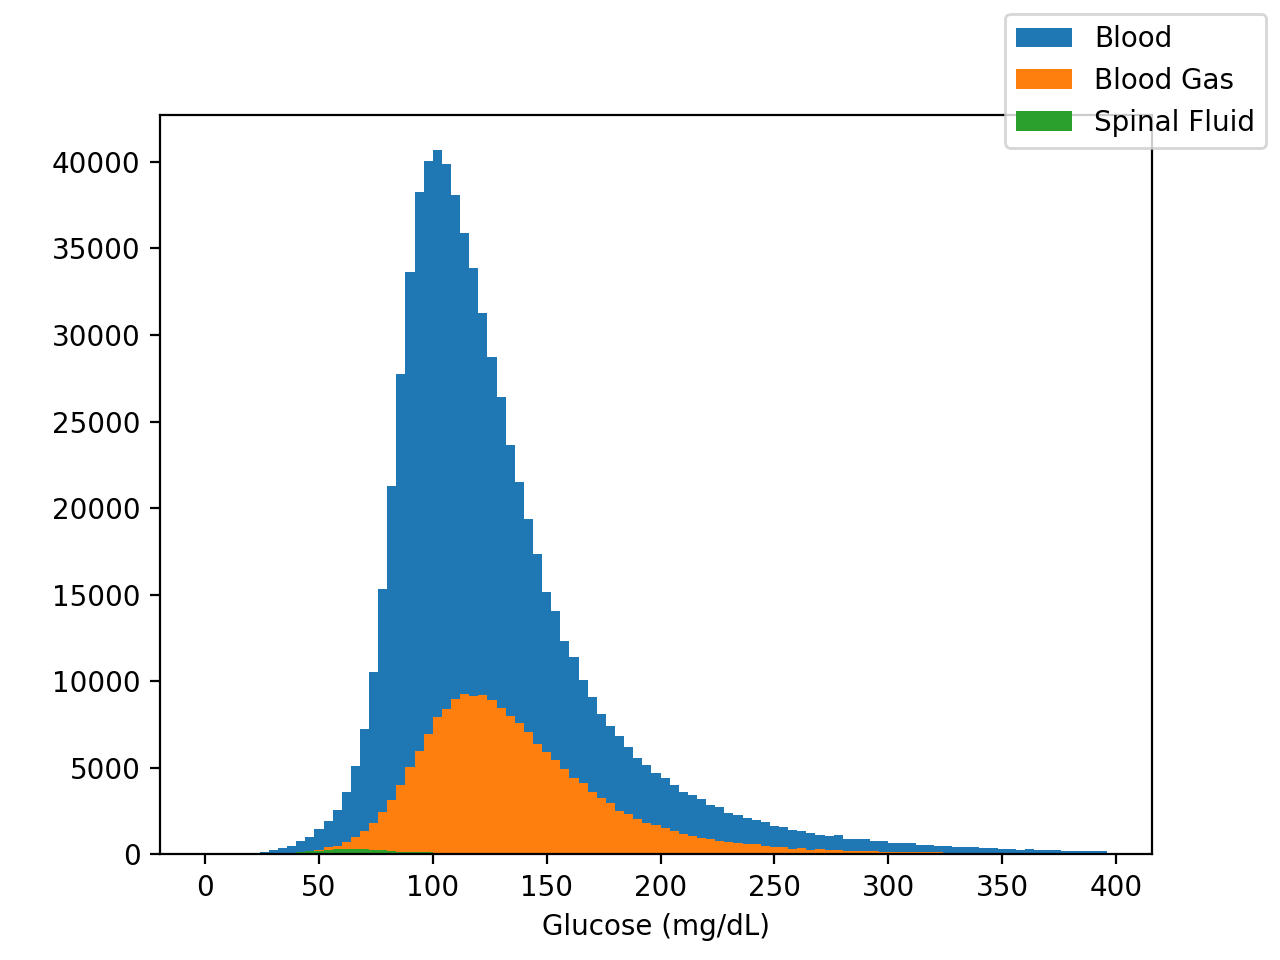

mean: 131 mg/dL std: 66 mg/dL
mean: 139 mg/dL std: 58 mg/dL
mean: 71 mg/dL std: 30 mg/dL


In [68]:
fig = pyplot.figure()
for i in [50931, 50809, 51014]:
    z = labs[labs['ITEMID'] == i]['VALUENUM']
    z.hist(bins=range(0, 400, 4), grid=False).set_xlabel('Glucose (mg/dL)');
    print('mean:', int(z.mean()), 'mg/dL', 'std:', int(z.std()), 'mg/dL')
fig.legend(['Blood', 'Blood Gas', 'Spinal Fluid']);

### Bilirubin Levels

In [27]:
lab_info.loc[lab_info['LABEL'].map(lambda i: 'bilirubin' in i.lower())]

,ROW_ID,LABEL,FLUID,CATEGORY,LOINC_CODE
ITEMID,,,,,
51464,664,Bilirubin,Urine,Hematology,5770-3
51465,665,Bilirubin Crystals,Urine,Hematology,5771-1
50838,39,"Bilirubin, Total, Ascites",Ascites,Chemistry,14422-0
50883,84,"Bilirubin, Direct",Blood,Chemistry,1968-7
50884,85,"Bilirubin, Indirect",Blood,Chemistry,1971-1
50885,86,"Bilirubin, Total",Blood,Chemistry,1975-2
51012,212,"Bilirubin, Total, CSF",Cerebrospinal Fluid (CSF),Chemistry,1973-7
51028,228,"Bilirubin, Total, Body Fluid",Other Body Fluid,Chemistry,1974-5
51049,249,"Bilirubin, Total, Pleural",Pleural,Chemistry,14421-2


<IPython.core.display.Javascript object>


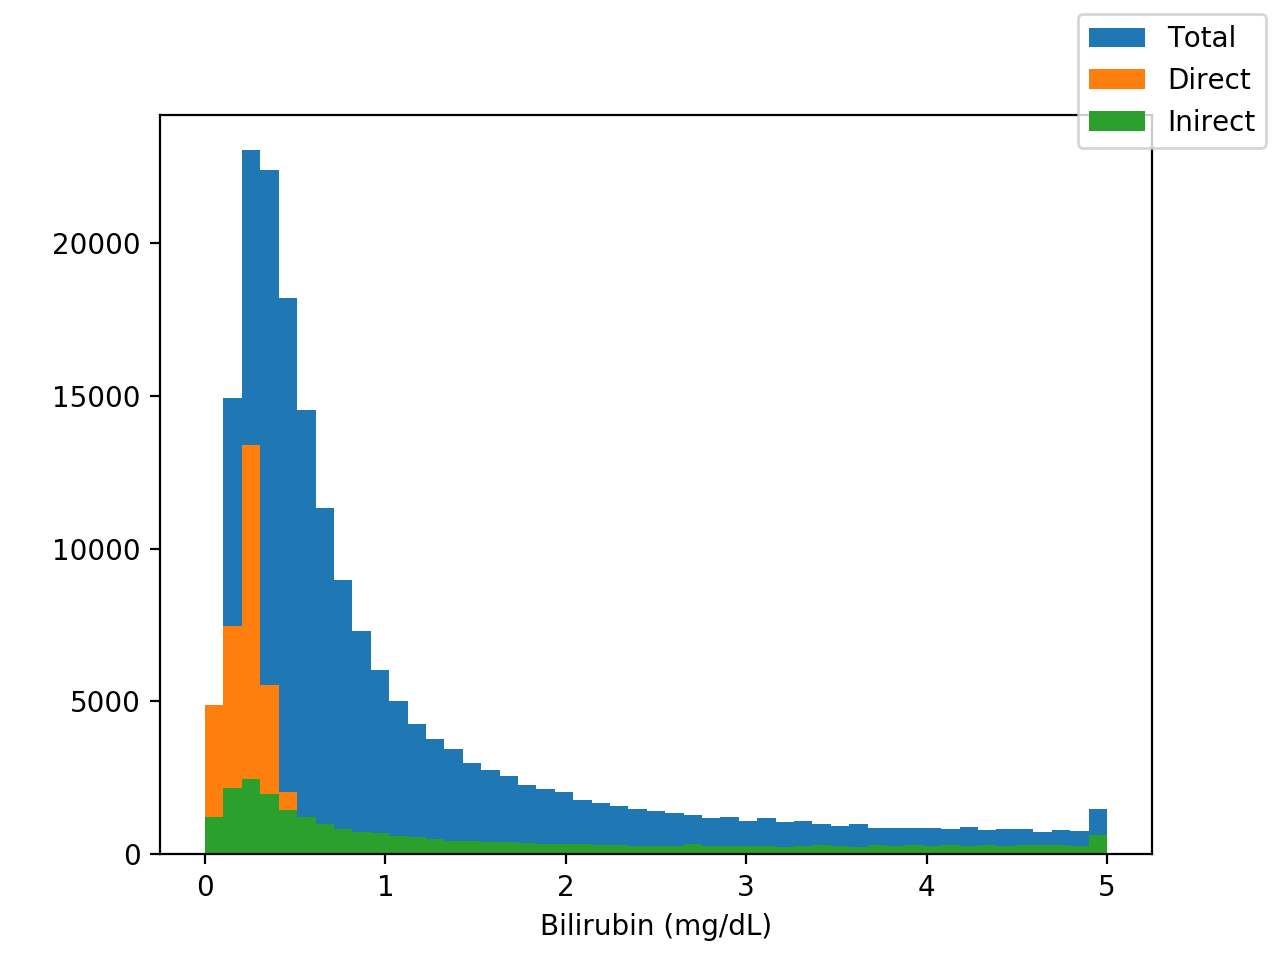

mean: 3.3 mg/dL std: 6.1 mg/dL
mean: 1.3 mg/dL std: 3.4 mg/dL
mean: 4.6 mg/dL std: 4.4 mg/dL


In [28]:
fig = pyplot.figure()
for i in [50885, 50883, 50884]:
    z = labs[labs['ITEMID'] == i]['VALUENUM']
    z.hist(bins=numpy.linspace(0, 5, 50), grid=False).set_xlabel('Bilirubin (mg/dL)');
    print('mean:', numpy.round(z.mean(), 1), 'mg/dL', 'std:', numpy.round(z.std(), 1), 'mg/dL')
fig.legend(['Total', 'Direct', 'Inirect']);

### Urine Chemistry

In [127]:
lab_info.loc[lab_info['LABEL'].map(lambda i: 'Creatinine, Urine' in i)]

,ROW_ID,LABEL,FLUID,CATEGORY,LOINC_CODE
ITEMID,,,,,
51070,270,"Albumin/Creatinine, Urine",Urine,Chemistry,14958-3
51082,282,"Creatinine, Urine",Urine,Chemistry,2161-8


In [128]:
lab_info.loc[lab_info['LABEL'].map(lambda i: 'Sodium, Urine' in i)]

,ROW_ID,LABEL,FLUID,CATEGORY,LOINC_CODE
ITEMID,,,,,
51100,300,"Sodium, Urine",Urine,Chemistry,2955-3


In [143]:
lab_info.loc[lab_info['LABEL'].map(lambda i: 'Potassium, Urine' in i)]

,ROW_ID,LABEL,FLUID,CATEGORY,LOINC_CODE
ITEMID,,,,,
51097,297,"Potassium, Urine",Urine,Chemistry,2828-2


<IPython.core.display.Javascript object>


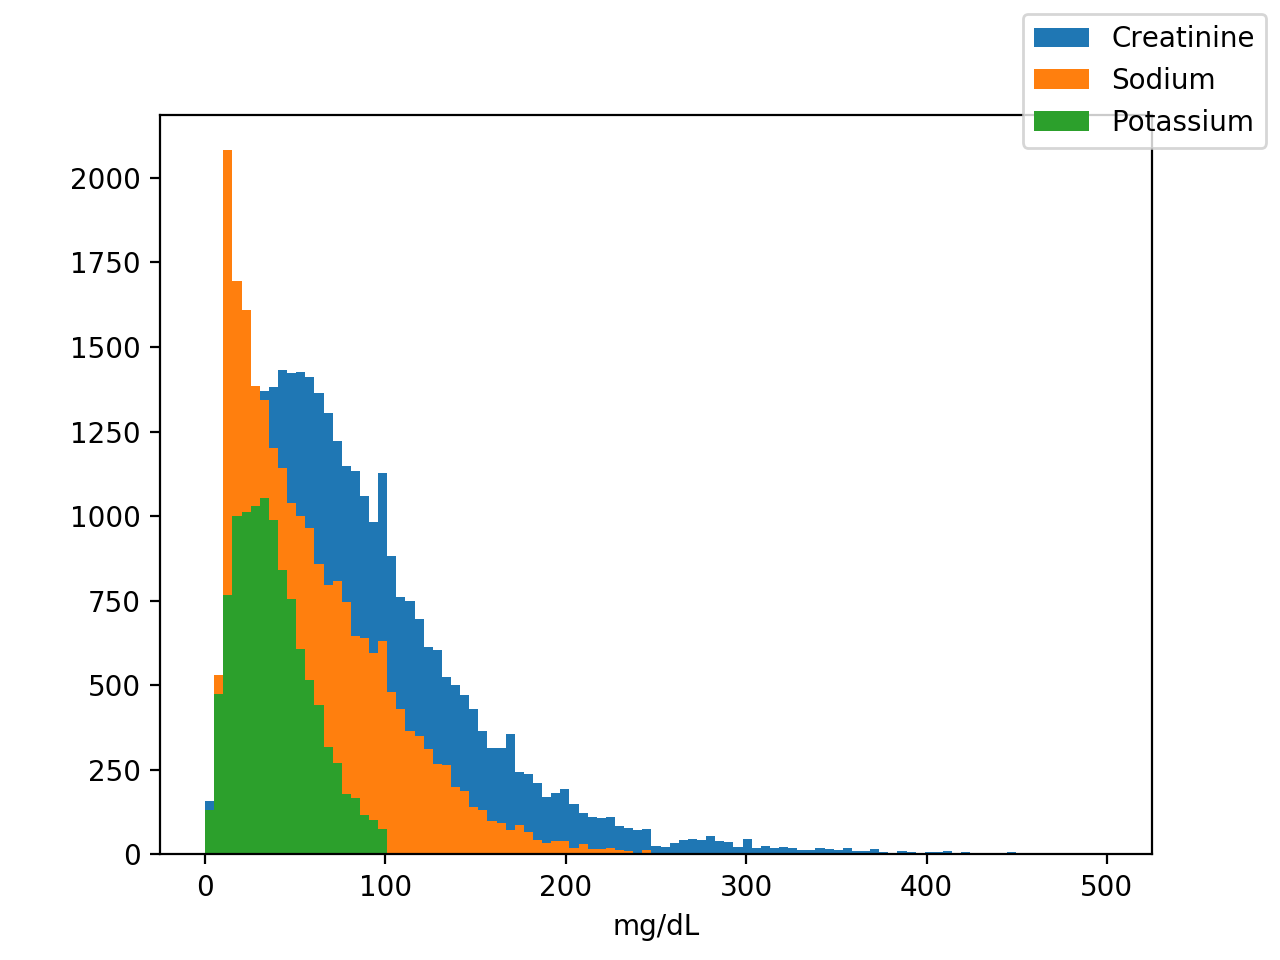

mean: 87 std: 63
mean: 59 std: 42
mean: 38 std: 20


In [144]:
fig = pyplot.figure()
for i in [51082, 51100, 51097]:
    z = labs[labs['ITEMID'] == i]['VALUENUM']
    z.hist(bins=numpy.linspace(0, 500, 100), grid=False).set_xlabel('mg/dL');
    print('mean:', int(z.mean()), 'std:', int(z.std()))
fig.legend(['Creatinine', 'Sodium', 'Potassium']);

### Acidity

In [77]:
lab_info.loc[lab_info['LABEL'] == 'pH']

,ROW_ID,LABEL,FLUID,CATEGORY,LOINC_CODE
ITEMID,,,,,
50820,21,pH,Blood,Blood Gas,11558-4
50831,32,pH,Other Body Fluid,Blood Gas,2748-2
51094,294,pH,Urine,Chemistry,2756-5
51491,691,pH,Urine,Hematology,5803-2


<IPython.core.display.Javascript object>


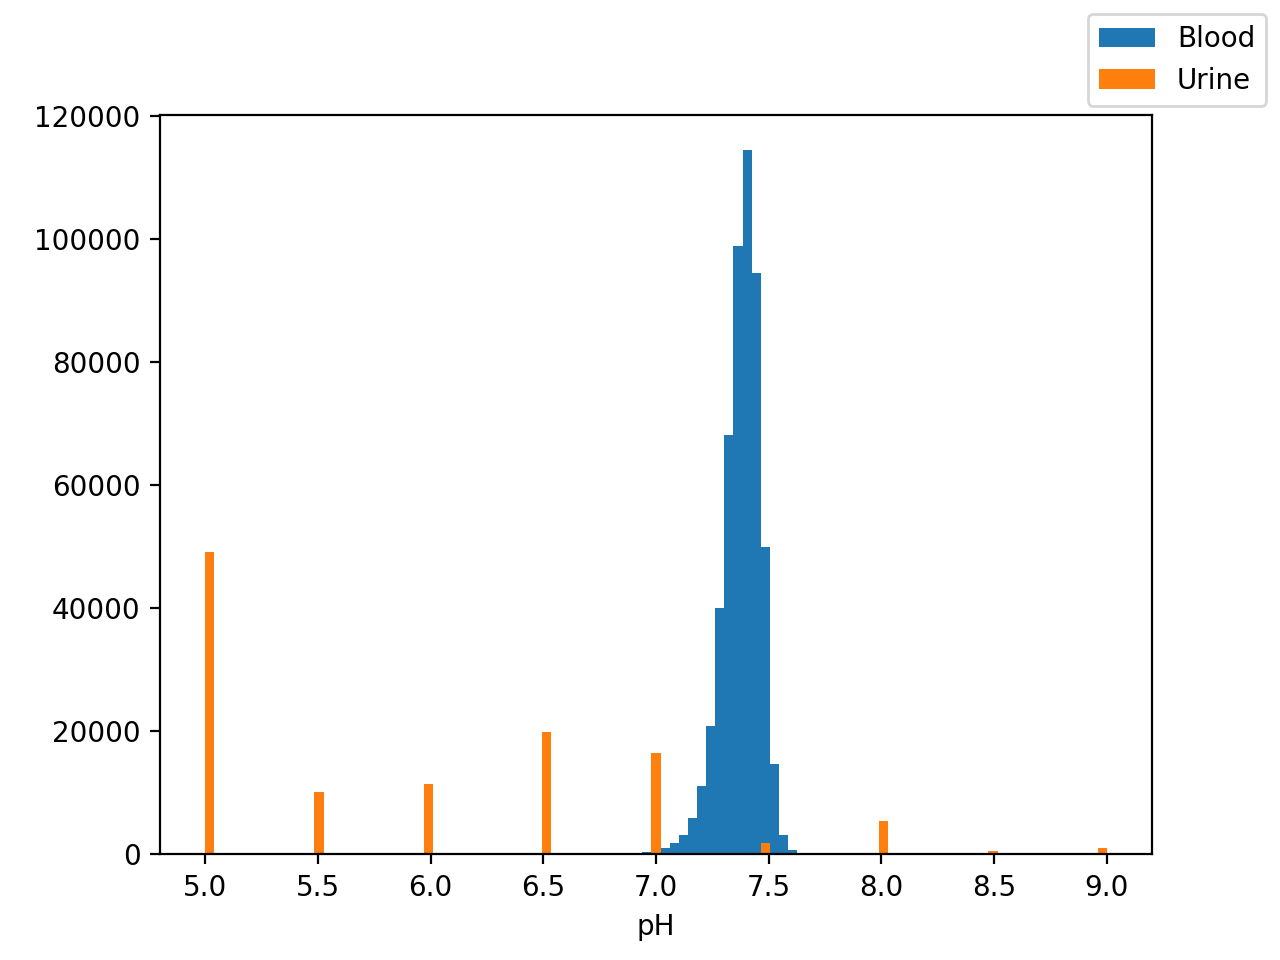

mean: 7 std: 0
mean: 5 std: 0


In [107]:
fig = pyplot.figure()
for i in [50820, 51491]:
    z = labs[labs['ITEMID'] == i]['VALUENUM']
    z.hist(bins=numpy.linspace(5, 9, 100), grid=False).set_xlabel('pH');
    print('mean:', int(z.mean()), 'std:', int(z.std()))
fig.legend(['Blood', 'Urine']);

## Chart Events

In [3]:
items_info = pandas.read_csv(path.format('D_ITEMS')).set_index('ITEMID')
items_info[:5]

,ROW_ID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
ITEMID,,,,,,,,,
497,457,Patient controlled analgesia (PCA) [Inject],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
498,458,PCA Lockout (Min),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
499,459,PCA Medication,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
500,460,PCA Total Dose,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
501,461,PCV Exh Vt (Obser),NaN,carevue,chartevents,NaN,NaN,NaN,NaN


In [4]:
pandas.read_csv(path.format('CHARTEVENTS'), nrows=5)

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,788,36,165660,241249,223834,2134-05-12 12:00:00,2134-05-12 13:56:00,17525,15.00,15.00,L/min,0,0,NaN,NaN
1,789,36,165660,241249,223835,2134-05-12 12:00:00,2134-05-12 13:56:00,17525,100.00,100.00,NaN,0,0,NaN,NaN
2,790,36,165660,241249,224328,2134-05-12 12:00:00,2134-05-12 12:18:00,20823,0.37,0.37,NaN,0,0,NaN,NaN
3,791,36,165660,241249,224329,2134-05-12 12:00:00,2134-05-12 12:19:00,20823,6.00,6.00,min,0,0,NaN,NaN
4,792,36,165660,241249,224330,2134-05-12 12:00:00,2134-05-12 12:19:00,20823,2.50,2.50,NaN,0,0,NaN,NaN


In [10]:
chart_items = pandas.read_csv(path.format('CHARTEVENTS'), usecols=['ITEMID', 'VALUE', 'VALUENUM', 'VALUEUOM'])
len(chart_items)

330712483

In [159]:
chart_counts = items_info.reindex(chart_items['ITEMID'])['LABEL'].value_counts()
for i in range(15):
    print(chart_counts[i*50:(i+1)*50])

Heart Rate                     7943034
Respiratory Rate               6123824
Heart Rhythm                   5326823
HR Alarm [Low]                 3495202
HR Alarm [High]                3492603
calprevflg                     3464326
SpO2                           3418917
Code Status                    3252472
Ectopy Type                    3236350
Precautions                    3205052
Service Type                   2955851
O2 saturation pulseoxymetry    2671816
Ectopy Frequency               2544519
Risk for Falls                 2413243
Activity                       2246025
Arterial BP [Systolic]         2096678
Arterial BP [Diastolic]        2085994
Arterial BP Mean               2072743
Safety Measures_U_1            1862707
Ectopy Type 1                  1849287
SpO2 Alarm [Low]               1802684
SpO2 Alarm [High]              1796313
Resp Alarm [Low]               1772387
Resp Alarm [High]              1769925
Assistance Device              1719321
SaO2                     

In [96]:
def get_value_counts(name):
    i = items_info[items_info['LABEL'] == name].reset_index().values[0][0]
    values = chart_items[chart_items['ITEMID'] == i]['VALUE']
    return values.map(lambda i: str(i).title()).value_counts()

In [99]:
get_value_counts('Heart Rhythm')

Normal Sinus        1966964
Sinus Tachy          535468
Atrial Fib           369100
Sinus Brady          108345
V Paced               82267
A Paced               67189
Av Paced              58885
1St Deg Av Block      57911
Atrial Flutter        26987
Junctional             8891
Sinus Arrhythmia       4282
Supravent Tachy        3610
2Nd Avb/Mobitz I       2058
Multfocalatrtach       1913
Comp Heart Block       1908
Other/Remarks          1382
Wand.Atrial Pace       1277
Vent. Tachy            1054
Nan                     994
2Nd Avb Mobitz 2        765
Idioventricular         657
Asystole                592
Parox Atr Tachy         315
Paced                   157
Ventricular Fib         110
Zoll Paced               63
Wenckebach                7
Name: VALUE, dtype: int64

In [98]:
get_value_counts('Ectopy Type')

None                2743187
Pvc'S                359870
Pac'S                123507
Vent. Bigeminy         3646
Nan                    2226
Atrial Bigeminy        1117
Vent. Trigeminy         794
Pnc'S                   671
Nod/Junc Escape         620
Fusion Beats            285
Vent. Escape            210
V Quadrigeminy           94
Atrial Trigeminy         74
Nodal Bigeminy           37
Nodal Trigeminy          11
A Quadrigeminy            1
Name: VALUE, dtype: int64

In [97]:
get_value_counts('Position')

Supine        433292
Right Side    212550
Left Side     204175
Nan             2081
Prone            867
Pronate            2
Ronated            1
Name: VALUE, dtype: int64

In [100]:
get_value_counts('Activity')

Bedrest          907215
Active           438387
Chair             66751
Ambulate           8212
Commode            8033
Dangle             3790
Bed As Chair       3320
Lethargic          2734
Other/Remarks      1048
Jittery            1037
Nan                 989
Unassessable        507
Comment             383
Name: VALUE, dtype: int64

In [101]:
get_value_counts('RUL Lung Sounds')

Clear               459842
Coarse              241536
Diminished           28735
Rhonchi              18575
Exp Wheeze           16699
Ins/Exp Wheeze        8999
Crackles              6345
Insp Wheeze           3456
Absent                1199
Bronchial             1040
Nan                    368
Other/Remarks          219
Pleural Friction       124
Name: VALUE, dtype: int64

In [102]:
get_value_counts('Diet Type')

Npo                342771
Tube Feeding       228307
Nas/Low Cholest     56634
Clear Liquid        48719
Tpn                 43336
House               42111
Diabetic            27821
Soft Solid           8483
Renal                8406
Full Liquid          6218
Other/Remarks        4979
Nan                   550
Ppn                   506
Lipids                 11
Name: VALUE, dtype: int64

## Note Events

In [114]:
notes = pandas.read_csv(path.format('NOTEEVENTS'))
notes[:5]

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [155]:
notes['DESCRIPTION'].value_counts()[:20]

Report                               1132519
Nursing Progress Note                 191836
CHEST (PORTABLE AP)                   169270
Physician Resident Progress Note       62698
CHEST (PA & LAT)                       43158
CT HEAD W/O CONTRAST                   34485
Respiratory Care Shift Note            31105
Nursing Transfer Note                  30773
Intensivist Note                       26144
CHEST PORT. LINE PLACEMENT             21596
Physician Attending Progress Note      21023
Physician Resident Admission Note      10654
Clinical Nutrition Note                 9395
PORTABLE ABDOMEN                        8143
CHEST (PRE-OP PA & LAT)                 8064
CT CHEST W/CONTRAST                     8001
CT ABDOMEN W/CONTRAST                   7304
MR HEAD W & W/O CONTRAST                7062
CT CHEST W/O CONTRAST                   6745
Generic Note                            6649
Name: DESCRIPTION, dtype: int64

In [119]:
notes['CATEGORY'].value_counts()

Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: CATEGORY, dtype: int64

In [141]:
print(notes['TEXT'][2])

Admission Date:  [**2119-5-4**]              Discharge Date:   [**2119-5-25**]


Service: CARDIOTHORACIC

Allergies:
Amlodipine

Attending:[**Last Name (NamePattern1) 1561**]
Chief Complaint:
81 yo F smoker w/ COPD, severe TBM, s/p tracheobronchoplasty [**5-5**]
s/p perc trach [**5-13**]

Major Surgical or Invasive Procedure:
bronchoscopy 3/31,4/2,3,[**6-12**], [**5-17**], [**5-19**]
s/p trachealplasty [**5-5**]
percutaneous tracheostomy [**5-13**] after failed extubation
down size trach on [**5-25**] to size 6 cuffless


History of Present Illness:
This 81 year old woman has a history of COPD. Over the past five

years she has had progressive difficulties with her breathing.
In
[**2118-6-4**] she was admitted to [**Hospital1 18**] for respiratory failure
due
to a COPD exacerbation. Due to persistent hypoxemia, she
required
intubation and a eventual bronchoscopy on [**2118-6-9**] revealed marked

narrowing of the airways on expiration consistent with
tracheomalacia.
She subsequently un

In [139]:
for i in range(5):
    print(notes[notes['CATEGORY']=='ECG']['TEXT'].values[i])

Sinus tachycardia
Short PR interval
Possible anterior infarct - age undetermined
Left atrial abnormality
Inferior T wave changes are borderline
Repolarization changes may be partly due to rate
Low QRS voltages in limb leads
Since previous tracing of [**2103-7-27**], no significant change


Sinus rhythm with A-V conduction delay.  Inferior myocardial infarction with
ST-T wave configuration consistent with acute process.  Right-sided chest
leads show one to two millimeters of ST segment elevation in leads V3R and V4R.
Since the previous tracing of the same date right-sided chest leads are taken.
TRACING #2


Sinus rhythm with A-V conduction delay. Infero-posterolateral myocardial
infarction with ST-T wave configuration consistent with acute process.
Since the previous tracing of [**2146-10-22**] the findings as outlined are now
present.
TRACING #1


Sinus rhythm. Normal ECG. Compared to the previous tracing of [**2145-12-12**] the rate
has slowed. QRS amplitude has increased. Otherwise, 

In [157]:
print(notes[notes['CATEGORY']=='Radiology']['TEXT'].values[0])

[**Last Name (LF) **],[**First Name3 (LF) **]                       EU                         [**2166-10-9**]  8:24 PM
 CTA HEAD W&W/O C & RECONS; CTA NECK W&W/OC & RECONS             Clip # [**Clip Number (Radiology) 38938**]
 CT BRAIN PERFUSION; -59 DISTINCT PROCEDURAL SERVICE
 Reason: eval for ICH/CVA
  Contrast: OPTIRAY Amt: 110
 ______________________________________________________________________________
 [**Hospital 2**] MEDICAL CONDITION:
  86 year old woman with new onset dysarthria, last known well at 1530
 REASON FOR THIS EXAMINATION:
  eval for ICH/CVA
 No contraindications for IV contrast
 ______________________________________________________________________________
                                  PFI REPORT
 1.  No evidence of acute infarct, or intracranial hemorrhage in brain.
 2.  No evidence of focal flow-limiting stenosis, occlusion, or aneurysm
 greater than 3 mm in arteries of anterior and posterior circulation of head.
 3.  Calcified plaque at the left distal 

In [151]:
print(notes[notes['CATEGORY']=='Respiratory ']['TEXT'].values[1])

Demographics
   Day of intubation: [**2133-1-9**]
   Day of mechanical ventilation: 5
   Ideal body weight: 56.7 None
   Ideal tidal volume: 226.8 / 340.2 / 453.6 mL/kg
   Airway
   Airway Placement Data
   Known difficult intubation: No
   Procedure location: ED
   Reason: Emergent (1st time)
   Tube Type
   ETT:
                   Position: 24 cm at teeth
                   Route: Oral
                   Type: Standard
                   Size: 7.5mm
   Tracheostomy tube:
                   Type:
                   Manufacturer:
                   Size:
                   PMV:
   Cuff  Management:
                   Vol/Press:
                                   Cuff pressure: 20  cmH2O
                                   Cuff volume:   mL /
                   Airway problems:
                   Comments:
   Lung sounds
   RLL Lung Sounds: Diminished
   RUL Lung Sounds: Clear
   LUL Lung Sounds: Clear
   LLL Lung Sounds: Diminished
   Comments:
   Secretions
   Sputum color / consistenc

In [144]:
print(notes[notes['CATEGORY']=='Echo']['TEXT'].values[0])

PATIENT/TEST INFORMATION:
Indication: Endocarditis.
Height: (in) 74
Weight (lb): 165
BSA (m2): 2.00 m2
BP (mm Hg): 102/72
HR (bpm): 86
Status: Inpatient
Date/Time: [**2102-6-14**] at 13:30
Test: Portable TTE (Complete)
Doppler: Full Doppler and color Doppler
Contrast: None
Technical Quality: Adequate


INTERPRETATION:

Findings:

LEFT ATRIUM: Normal LA and RA cavity sizes.

LEFT VENTRICLE: Normal LV wall thickness, cavity size and regional/global
systolic function (LVEF >55%). No resting LVOT gradient.

RIGHT VENTRICLE: Normal RV chamber size and free wall motion.

AORTA: Moderately dilated aortic sinus. Normal ascending aorta diameter.
Normal aortic arch diameter. No 2D or Doppler evidence of distal arch
coarctation.

AORTIC VALVE: Normal aortic valve leaflets (3). No AS. No AR. No masses or
vegetations on aortic valve.

MITRAL VALVE: Normal mitral valve leaflets with trivial MR. No MVP. No mass or
vegetation on mitral valve. Normal mitral valve supporting structures.

TRICUSPID VALVE

## Input Events

In [33]:
items_info = pandas.read_csv(path.format('D_ITEMS')).set_index('ITEMID')
items_info[:5]

,ROW_ID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
ITEMID,,,,,,,,,
497,457,Patient controlled analgesia (PCA) [Inject],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
498,458,PCA Lockout (Min),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
499,459,PCA Medication,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
500,460,PCA Total Dose,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
501,461,PCV Exh Vt (Obser),NaN,carevue,chartevents,NaN,NaN,NaN,NaN


### CareVue

In [ ]:
input_cv = pandas.read_csv(path.format('INPUTEVENTS_CV'), low_memory=False)

In [84]:
input_cv[:5][input_cv.keys()[:12]]

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,RATEUOM,STORETIME,CGID
0,592,24457,184834.0,205776.0,2193-09-11 09:00:00,30056,100.0,ml,NaN,NaN,2193-09-11 11:12:00,14990.0
1,593,24457,184834.0,205776.0,2193-09-11 12:00:00,30056,200.0,ml,NaN,NaN,2193-09-11 12:05:00,14990.0
2,594,24457,184834.0,205776.0,2193-09-11 16:00:00,30056,160.0,ml,NaN,NaN,2193-09-11 16:52:00,14990.0
3,595,24457,184834.0,205776.0,2193-09-11 19:00:00,30056,240.0,ml,NaN,NaN,2193-09-11 19:06:00,14990.0
4,596,24457,184834.0,205776.0,2193-09-11 21:00:00,30056,50.0,ml,NaN,NaN,2193-09-11 21:19:00,15029.0


In [85]:
input_cv[:5][input_cv.keys()[12:]]

,ORDERID,LINKORDERID,STOPPED,NEWBOTTLE,ORIGINALAMOUNT,ORIGINALAMOUNTUOM,ORIGINALROUTE,ORIGINALRATE,ORIGINALRATEUOM,ORIGINALSITE
0,756654,9359133,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
1,3564075,9359133,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
2,422646,9359133,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
3,5137889,9359133,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
4,8343792,9359133,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN


In [35]:
items_info.reindex(input_cv['ITEMID'])['LABEL'].value_counts()[:20]

D5W                  2557507
.9% Normal Saline    2392372
Propofol              924614
Insulin               825758
Heparin               813242
Fentanyl              780555
Neosynephrine-k       554582
Midazolam             505509
Levophed-k            476971
KCL                   291669
Amiodarone            259281
Nitroglycerine-k      239268
D10W                  227011
Lactated Ringers      214893
TPN                   204714
D5/.45NS              200221
Lipids 20%            194741
Lasix                 193403
Po Intake             188107
Dopamine              173745
Name: LABEL, dtype: int64

### MetaVision

In [ ]:
input_mv = pandas.read_csv(path.format('INPUTEVENTS_MV'), low_memory=False)

In [77]:
input_mv[:5][input_mv.keys()[:11]]

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,RATEUOM
0,241,27063,139787,223259.0,2133-02-05 06:29:00,2133-02-05 08:45:00,225166,6.774532,mEq,NaN,NaN
1,242,27063,139787,223259.0,2133-02-05 05:34:00,2133-02-05 06:30:00,225944,28.132997,ml,30.142497,mL/hour
2,243,27063,139787,223259.0,2133-02-05 05:34:00,2133-02-05 06:30:00,225166,2.813300,mEq,NaN,NaN
3,244,27063,139787,223259.0,2133-02-03 12:00:00,2133-02-03 12:01:00,225893,1.000000,dose,NaN,NaN
4,245,27063,139787,223259.0,2133-02-03 12:00:00,2133-02-03 12:01:00,220949,100.000000,ml,NaN,NaN


In [78]:
input_mv[:5][input_mv.keys()[11:20]]

,STORETIME,CGID,ORDERID,LINKORDERID,ORDERCATEGORYNAME,SECONDARYORDERCATEGORYNAME,ORDERCOMPONENTTYPEDESCRIPTION,ORDERCATEGORYDESCRIPTION,PATIENTWEIGHT
0,2133-02-05 06:27:00,16009,4892074,4892074,02-Fluids (Crystalloids),Additive (Crystalloid),Additives ...,Continuous IV,83.2
1,2133-02-05 12:57:00,20053,5211428,1576890,02-Fluids (Crystalloids),Additive (Crystalloid),Main order parameter,Continuous IV,83.2
2,2133-02-05 12:57:00,20053,5211428,1576890,02-Fluids (Crystalloids),Additive (Crystalloid),Additives ...,Continuous IV,83.2
3,2133-02-03 13:21:00,20030,5213971,5213971,08-Antibiotics (IV),02-Fluids (Crystalloids),Main order parameter,Drug Push,83.2
4,2133-02-03 13:21:00,20030,5213971,5213971,08-Antibiotics (IV),02-Fluids (Crystalloids),Mixed solution,Drug Push,83.2


In [74]:
input_mv[:5][input_mv.keys()[20:]]

,TOTALAMOUNT,TOTALAMOUNTUOM,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE,ORIGINALAMOUNT,ORIGINALRATE
0,100.0,ml,0,0,1,Rewritten,NaN,RN,2133-02-05 12:52:00,10.000000,0.050000
1,100.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,28.132998,30.255817
2,100.0,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,2.813300,0.050426
3,100.0,ml,0,0,2,Rewritten,RN,NaN,2133-02-03 17:06:00,1.000000,1.000000
4,100.0,ml,0,0,2,Rewritten,RN,NaN,2133-02-03 17:06:00,100.000000,0.000000


#### Patient Weight

<IPython.core.display.Javascript object>


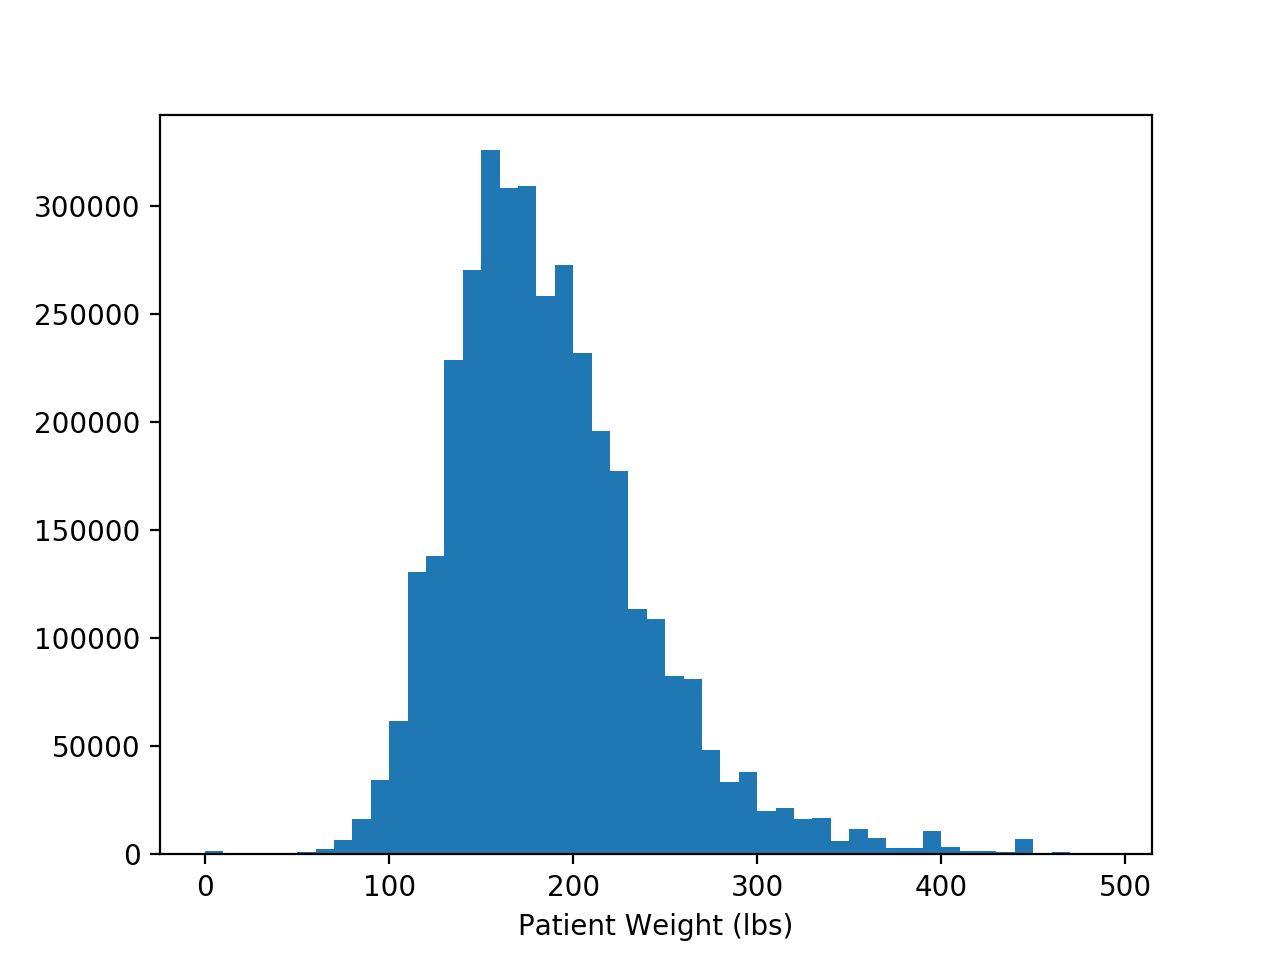

mean: 188.6 lbs


In [89]:
pyplot.figure()
weight = input_mv['PATIENTWEIGHT'] * 2.20462
weight.hist(bins=range(0,500,10), grid=False).set_xlabel('Patient Weight (lbs)')
print('mean:', numpy.round(weight.mean(), 1), 'lbs')

In [37]:
items_info.reindex(input_mv['ITEMID'])['LABEL'].value_counts()[:20]

NaCl 0.9%                       527855
Dextrose 5%                     406345
Solution                        246312
Propofol                        178819
PO Intake                       135438
Insulin - Regular               119668
Gastric Meds                     97629
Phenylephrine                    93571
Norepinephrine                   89697
Fentanyl                         86340
Potassium Chloride               80724
Heparin Sodium (Prophylaxis)     77518
Midazolam (Versed)               71674
GT Flush                         63417
LR                               50013
Furosemide (Lasix)               47444
Vancomycin                       46352
Fentanyl (Concentrate)           45866
Morphine Sulfate                 41064
KCL (Bolus)                      37967
Name: LABEL, dtype: int64

## Output Events

In [38]:
outputs = pandas.read_csv(path.format('OUTPUTEVENTS'))
outputs[:5]

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,VALUE,VALUEUOM,STORETIME,CGID,STOPPED,NEWBOTTLE,ISERROR
0,344,21219,177991.0,225765.0,2142-09-08 10:00:00,40055,200.0,ml,2142-09-08 12:08:00,17269,NaN,NaN,NaN
1,345,21219,177991.0,225765.0,2142-09-08 12:00:00,40055,200.0,ml,2142-09-08 12:08:00,17269,NaN,NaN,NaN
2,346,21219,177991.0,225765.0,2142-09-08 13:00:00,40055,120.0,ml,2142-09-08 13:39:00,17269,NaN,NaN,NaN
3,347,21219,177991.0,225765.0,2142-09-08 14:00:00,40055,100.0,ml,2142-09-08 16:17:00,17269,NaN,NaN,NaN
4,348,21219,177991.0,225765.0,2142-09-08 16:00:00,40055,200.0,ml,2142-09-08 16:17:00,17269,NaN,NaN,NaN


In [41]:
items_info.reindex(outputs['ITEMID'])['LABEL'].value_counts()[:10]

Urine Out Foley                1917421
Foley                          1186717
Chest Tubes CTICU CT 1          152716
Urine .                         108982
Stool Out Stool                  81828
Chest Tube #1                    81128
Urine Out Void                   69467
Void                             63020
Ultrafiltrate Ultrafiltrate      62381
Drain Out #1 Jackson Pratt       28864
Name: LABEL, dtype: int64

## Prescriptions

In [42]:
prescriptions = pandas.read_csv(path.format('PRESCRIPTIONS'), low_memory=False)
prescriptions[:5]

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,469061711.0,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,56017275.0,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,338055002.0,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.0,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,54829725.0,20mg Tablet,20,mg,1,TAB,PO


In [43]:
prescriptions['DRUG'].value_counts()[:50]

Potassium Chloride             192993
Insulin                        143465
D5W                            142241
Furosemide                     133122
0.9% Sodium Chloride           130147
NS                             129731
Magnesium Sulfate               90427
Iso-Osmotic Dextrose            87005
Sodium Chloride 0.9%  Flush     83392
Acetaminophen                   78768
Metoprolol                      73986
5% Dextrose                     73829
SW                              72522
Morphine Sulfate                62134
Metoprolol Tartrate             59824
Lorazepam                       55352
Calcium Gluconate               52110
Heparin                         52069
Docusate Sodium                 45694
Vancomycin                      42634
Bisacodyl                       41075
Warfarin                        39678
Heparin Sodium                  37702
HYDROmorphone (Dilaudid)        37673
LR                              35409
Propofol                        34462
Pantoprazole

## Drug Codes

In [158]:
drgcodes = pandas.read_csv(path.format('DRGCODES'))
drgcodes[:5]

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
0,342,2491,144486,HCFA,28,"TRAUMATIC STUPOR & COMA, COMA <1 HR AGE >17 WI...",NaN,NaN
1,343,24958,162910,HCFA,110,MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICAT...,NaN,NaN
2,344,18325,153751,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN
3,345,17887,182692,HCFA,14,SPECIFIC CEREBROVASCULAR DISORDERS EXCEPT TRAN...,NaN,NaN
4,346,11113,157980,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN


In [165]:
drgcodes['DESCRIPTION'].value_counts()[:10]

Septicemia & Disseminated Infections                                  3854
NORMAL NEWBORN                                                        2805
Cardiac Valve Procedures w/o Cardiac Catheterization                  2486
Coronary Bypass w/o Cardiac Cath Or Percutaneous Cardiac Procedure    2378
Neonate, Bwt > 2499g, Normal Newborn Or Neonate W Other Problem       2099
Craniotomy Except for Trauma                                          1764
Coronary Bypass w/ Cardiac Cath Or Percutaneous Cardiac Procedure     1459
Percutaneous Cardiovascular Procedures w/ AMI                         1387
Intracranial Hemorrhage                                               1377
Heart Failure                                                         1352
Name: DESCRIPTION, dtype: int64

In [163]:
drgcodes['DRG_TYPE'].value_counts()

APR     66634
HCFA    31644
MS      27279
Name: DRG_TYPE, dtype: int64

## ICU Stays

In [3]:
icustays = pandas.read_csv(path.format('ICUSTAYS'))
icustays[:5]

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [4]:
icustays['DBSOURCE'].value_counts()

carevue       37776
metavision    23620
both            136
Name: DBSOURCE, dtype: int64

<IPython.core.display.Javascript object>


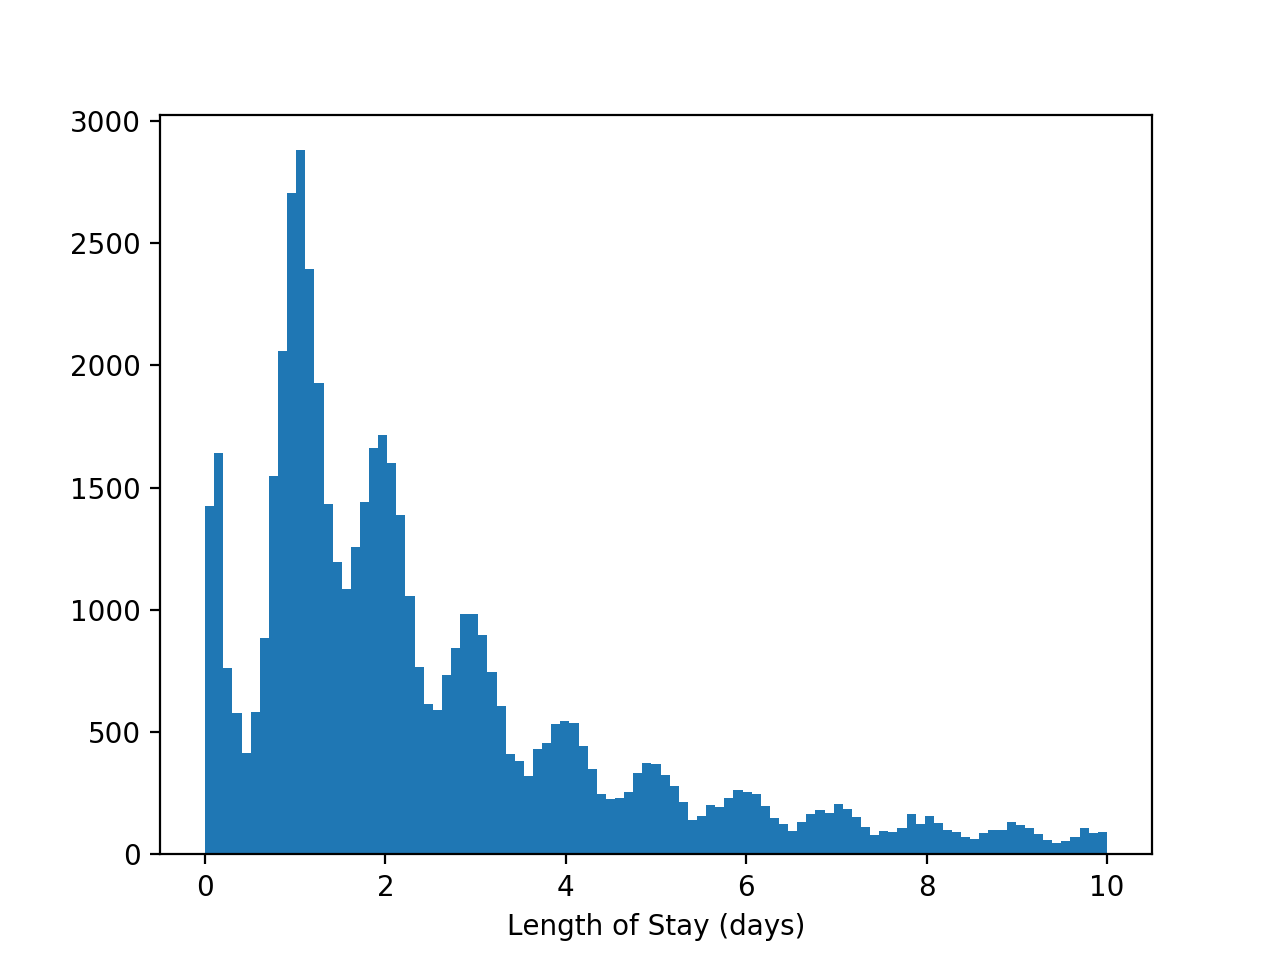

In [6]:
pyplot.figure()
icustays['LOS'].hist(bins=numpy.linspace(0, 10, 100), grid=False).set_xlabel('Length of Stay (days)');

## MicroBio

In [47]:
date_cols = ['CHARTDATE', 'CHARTTIME']
microbio = pandas.read_csv(path.format('MICROBIOLOGYEVENTS'), parse_dates=date_cols)
microbio[:5]

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,744,96,170324,2156-04-13,2156-04-13 14:18:00,70021.0,BRONCHOALVEOLAR LAVAGE,80026.0,PSEUDOMONAS AERUGINOSA,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,745,96,170324,2156-04-20,2156-04-20 13:10:00,70062.0,SPUTUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,746,96,170324,2156-04-20,2156-04-20 16:00:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,747,96,170324,2156-04-20,NaT,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,748,96,170324,2156-04-20,NaT,70079.0,URINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
microbio['SPEC_TYPE_DESC'].value_counts()[:10]

BLOOD CULTURE              179930
URINE                      140671
SPUTUM                      99887
SWAB                        37895
MRSA SCREEN                 32280
STOOL                       26427
CATHETER TIP-IV             21216
BRONCHOALVEOLAR LAVAGE      11613
BLOOD CULTURE - NEONATE     10032
TISSUE                       9151
Name: SPEC_TYPE_DESC, dtype: int64

In [49]:
microbio['AB_NAME'].value_counts()[:10]

GENTAMICIN            25770
LEVOFLOXACIN          18652
CEFTAZIDIME           14640
TOBRAMYCIN            14504
TRIMETHOPRIM/SULFA    14105
CEFEPIME              13465
MEROPENEM             12982
VANCOMYCIN            12915
OXACILLIN             12201
CIPROFLOXACIN         12023
Name: AB_NAME, dtype: int64

In [50]:
microbio['ORG_NAME'].value_counts()[:15]

STAPH AUREUS COAG +                   63947
ESCHERICHIA COLI                      60133
STAPHYLOCOCCUS, COAGULASE NEGATIVE    32777
KLEBSIELLA PNEUMONIAE                 30628
PSEUDOMONAS AERUGINOSA                28926
ENTEROCOCCUS SP.                      16429
YEAST                                 14182
PROTEUS MIRABILIS                      9605
ENTEROBACTER CLOACAE                   8709
SERRATIA MARCESCENS                    6054
KLEBSIELLA OXYTOCA                     5331
GRAM NEGATIVE ROD(S)                   3486
ENTEROBACTER AEROGENES                 2842
ENTEROCOCCUS FAECIUM                   2689
ACINETOBACTER BAUMANNII                2582
Name: ORG_NAME, dtype: int64

## Callout

In [95]:
callout = pandas.read_csv(path.format('CALLOUT'))
callout[:5][callout.keys()[:10]]

,ROW_ID,SUBJECT_ID,HADM_ID,SUBMIT_WARDID,SUBMIT_CAREUNIT,CURR_WARDID,CURR_CAREUNIT,CALLOUT_WARDID,CALLOUT_SERVICE,REQUEST_TELE
0,402,854,175684,52.0,NaN,29.0,MICU,1,MED,0
1,403,864,138624,15.0,NaN,55.0,CSRU,55,CSURG,0
2,404,864,138624,12.0,NaN,55.0,CSRU,55,CSURG,1
3,405,867,184298,7.0,NaN,17.0,CCU,17,CCU,1
4,157,306,167129,57.0,NaN,3.0,SICU,44,NSURG,1


In [96]:
callout[:5][callout.keys()[10:]]

,REQUEST_RESP,REQUEST_CDIFF,REQUEST_MRSA,REQUEST_VRE,CALLOUT_STATUS,CALLOUT_OUTCOME,DISCHARGE_WARDID,ACKNOWLEDGE_STATUS,CREATETIME,UPDATETIME,ACKNOWLEDGETIME,OUTCOMETIME,FIRSTRESERVATIONTIME,CURRENTRESERVATIONTIME
0,0,0,0,0,Inactive,Discharged,29.0,Acknowledged,2146-10-05 13:16:55,2146-10-05 13:16:55,2146-10-05 13:24:00,2146-10-05 18:55:22,2146-10-05 15:27:44,NaN
1,0,0,0,0,Inactive,Discharged,55.0,Acknowledged,2114-11-28 08:31:39,2114-11-28 09:42:08,2114-11-28 09:43:08,2114-11-28 12:10:02,NaN,NaN
2,0,0,0,0,Inactive,Discharged,55.0,Acknowledged,2114-11-30 10:24:25,2114-12-01 09:06:18,2114-12-01 12:26:05,2114-12-01 21:55:05,NaN,NaN
3,1,0,0,0,Inactive,Discharged,17.0,Acknowledged,2136-12-29 08:45:42,2136-12-29 10:17:16,2136-12-29 10:33:51,2136-12-29 18:10:02,NaN,NaN
4,0,0,0,0,Inactive,Discharged,3.0,Acknowledged,2199-09-18 11:47:47,2199-09-18 11:47:47,2199-09-18 11:58:33,2199-09-18 15:10:02,NaN,NaN


In [97]:
callout['CALLOUT_SERVICE'].value_counts()

MED      13791
CSURG     4782
CCU       2993
SURG      2902
NSURG     2234
TRAUM     1840
NMED      1659
OMED      1368
TSURG      789
CMED       760
VSURG      526
ORTHO      424
GYN        112
GU         106
PSURG       78
ENT         76
OBS         41
PSYCH        7
NBB          5
NB           4
DENT         2
Name: CALLOUT_SERVICE, dtype: int64

## Caregivers

In [98]:
caregivers = pandas.read_csv(path.format('CAREGIVERS'))
caregivers[:5]

,ROW_ID,CGID,LABEL,DESCRIPTION
0,2228,16174,RO,Read Only
1,2229,16175,RO,Read Only
2,2230,16176,Res,Resident/Fellow/PA/NP
3,2231,16177,RO,Read Only
4,2232,16178,RT,Respiratory


In [100]:
caregivers['DESCRIPTION'].value_counts()

Read Only                1954
Resident/Fellow/PA/NP    1546
RN                        600
Attending                 189
Rehabilitation            173
Respiratory               121
PCT/NA                    121
Pharmacist                 85
Dietitian                  82
UCO                        71
Social Worker              71
Case Manager               70
Administrator              28
Pastoral Care              23
Research Assistant         11
IMD                        10
Name: DESCRIPTION, dtype: int64

## Services

In [101]:
services = pandas.read_csv(path.format('SERVICES'))
services[:5]

,ROW_ID,SUBJECT_ID,HADM_ID,TRANSFERTIME,PREV_SERVICE,CURR_SERVICE
0,758,471,135879,2122-07-22 14:07:27,TSURG,MED
1,759,471,135879,2122-07-26 18:31:49,MED,TSURG
2,760,472,173064,2172-09-28 19:22:15,NaN,CMED
3,761,473,129194,2201-01-09 20:16:45,NaN,NB
4,762,474,194246,2181-03-23 08:24:41,NaN,NB


In [106]:
services['CURR_SERVICE'].value_counts()

MED      24866
CMED      9135
CSURG     7911
NB        7806
SURG      5514
NSURG     4100
TRAUM     3137
NMED      2957
OMED      2286
VSURG     1455
TSURG     1338
ORTHO     1101
GU         436
NBB        346
GYN        306
PSURG      283
ENT        247
OBS        113
DENT         5
PSYCH        1
Name: CURR_SERVICE, dtype: int64

In [111]:
(services['PREV_SERVICE'] + ', '  + services['CURR_SERVICE']).value_counts()[:10]

CMED, CSURG    2633
MED, SURG      1175
MED, CMED      1165
MED, OMED      1122
OMED, MED       850
CMED, MED       750
SURG, MED       666
ORTHO, MED      367
NMED, MED       329
MED, NMED       329
dtype: int64

## Transfers

In [107]:
transfers = pandas.read_csv(path.format('TRANSFERS'))
transfers[:5]

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,EVENTTYPE,PREV_CAREUNIT,CURR_CAREUNIT,PREV_WARDID,CURR_WARDID,INTIME,OUTTIME,LOS
0,657,111,192123,254245.0,carevue,transfer,CCU,MICU,7.0,23.0,2142-04-29 15:27:11,2142-05-04 20:38:33,125.19
1,658,111,192123,NaN,carevue,transfer,MICU,NaN,23.0,45.0,2142-05-04 20:38:33,2142-05-05 11:46:32,15.13
2,659,111,192123,NaN,carevue,discharge,NaN,NaN,45.0,NaN,2142-05-05 11:46:32,NaN,NaN
3,660,111,155897,249202.0,metavision,admit,NaN,MICU,NaN,52.0,2144-07-01 04:13:59,2144-07-01 05:19:39,1.09
4,661,111,155897,NaN,metavision,transfer,MICU,NaN,52.0,32.0,2144-07-01 05:19:39,2144-07-01 06:28:29,1.15


In [108]:
transfers['CURR_CAREUNIT'].value_counts()

MICU     26400
NICU     18629
CSRU     13663
SICU     11323
CCU       9542
NWARD     8295
TSICU     8164
Name: CURR_CAREUNIT, dtype: int64

In [110]:
(transfers['PREV_CAREUNIT'] + ', '  + transfers['CURR_CAREUNIT']).value_counts()[:10]

NICU, NICU      10266
NICU, NWARD      4923
NWARD, NICU      3335
CSRU, CSRU       3025
MICU, MICU       2714
SICU, SICU        917
TSICU, TSICU      866
CCU, CCU          536
CCU, MICU         440
SICU, MICU        432
dtype: int64